# Section 1
In this section, we'll cover what a model is, how to evaluate a model, and how to handle datasets. Practical exercises are included throughout the notebook, and we encourage you to complete them.

# Definitions

Before we get started, we'll need some vocabulary to be on the same page. The definitions are placed here for easy reference; you don't need to memorize them before starting.

|Term|Definition|
|:--|:--|
|**Model**|A set of parameters that makes a prediction based on a given input. The parameter values are fitted to available data.|
|**Estimator**|An instance of a model in `sklearn`. An estimator refers to a common interface in `sklearn` that is used to train and evaluate models.|
|**Input**|Data from which we would like to make predictions.  For example, results from lab tests (e.g. hematocrit, protein concentrations, response time) to inform a diagnosis (e.g. anemia, Alzheimer's, Muliple Sclerosis). Data is typically multidimensional, with each sample having multiple values that we think might inform our predictions. Conventionally, the dimensions of data are [number of subjects] x [number of features]|
|**Label**|True values corresponding to a data sample that we would like to accurately predict given. Also known as 'target'|
|**Prediction**|The output of a model for a given sample. In the ideal case, the prediction should be the sample's label.|
|**Feature**|One dimension of the input data which corresponds to a particular measure. When describing a person, 'height', 'weight', 'hair colour' could be considered as features.|
|**Complexity**|Refers to the number of parameters in a model. A model with 10 parameters is said to be more complex than a model with 3.|
|**Metric**|A function that defines how good a prediction is.

## What is Machine Learning?

A machine learning model is a set of parameters that can use data to improve its own predictions. By exposing it to data and defining a way of evaluating predictions, we can compute the set of parameters which produces better predictions with little manual intervention.

## Inputs & Outputs

We can reduce a lot of machine learning analysis to this schematic:
  
![ML Schematic](img/ml_diagram.png)

Given some input, we put it through the model, and the model makes a prediction of what the output should be. It's important to note that there are different names for all parts of that schematic, but they all refer to the same conceptual diagram.  
  
What makes this structure a machine learning model is if the model can change its parameters to make its predictions more similar to available data.

# Python Warmup

Let's start with a quick warmup exercise that will be useful later. Define a function, "create_data" which takes in two values, $x_1$ and $x_2$, multiples each by input scalars, sums them, and adds a random number. This function will be used to simulate hundreds of points sampled at different values of $(x_1, x_2)$.

First, break down the requirements:
1) What are the expected inputs?  
2) What are the expected outputs?  

For (1):  
We have the two sets of values $x_1$ and $x_2$, and two scalars that we'll call beta_1 and beta_2. Our function should have four inputs.  
  
For (2):  
The description specifies the set of operations that are needed. The operation is to multiply $x_1$ by beta_1, $x_2$ by beta_2, sum the result together, then add a random number. The expected output is the result of those operations:  
$output = \beta_1 * x_1 + \beta_2 * x_2 + random$  
Lastly, how do we create the random value? There are a number of ways; `numpy` is a Python package for numerical computing and includes functions for creating random values. `numpy.random.randn()` produces a random values sampled from a Gaussian distribution; it will suffice for our purposes.

Now that we have our specifications, we can create our function.  
Here are a few Python reminders:  
- You can make other packages available via the `import` keyword: `import numpy` will make the `numpy` package available.
- Reminder: Python uses the `def` keyword to specify the start of a function, and has the following structure:  
    `def FUNCTION_NAME(INPUT_1, INPUT_2):`  
- Replace `[FUNCTION_NAME]` with the name of your function.  
- Each input is separated by a comma.  
- There are different ways of defining functions, but this format works for now.
- For example:
    `def create_data(x_1, x_2, beta_1, beta_2):`
- Python uses the `return` keyword to output values. `return y` would return the value stored in the variable `y`

In [1]:
import numpy
def create_data(x_1, x_2, beta_1, beta_2):
    # function code goes here
    rand = numpy.random.randn()
    return beta_1 * x_1 + beta_2*x_2 + rand
    

In [2]:
y = create_data(5,2, 1,2)
print(y)

10.140943976459054


You can run the previous cell using `Shift` + `Enter` and see that the value changes but is centered around 9.  
Our function works for entering single values, but our interest is in using it to generate hundred of points.  
Since this function will be used to create _hundreds_ of points, this is a problem. We saw how to create `for` loops in the Python intro, and that could be one way to solve the issue:

In [3]:
x1_list = [5, 2, 1]
x2_list = [6, 1, 0]
y = []
for i in range(3):
    x1 = x1_list[i]
    x2 = x2_list[i]
    y.append(create_data(x1, x2, 1, 2))
print(y)

[16.803632933985018, 4.035611494236171, 1.0125076300462892]


However, this makes the code harder to read, and harder to modify. Instead, let's move the for loop into our function's definition. We can use `len(x1)` to get the length of a list.
Let's modify our function definition to generate samples for each (x1, x2).

In [4]:
import numpy
def create_data(x_1, x_2, beta_1, beta_2):
    y_list = []
    for i in range( len(x_1)):
        rand = numpy.random.randn()
        y = x_1[i]*beta_1 + x_2[i]*beta_2 + rand
        y_list.append(y)
    return y_list

In [5]:
y = create_data([5], [2], 1,2)
print(y)
y = create_data([5,6], [2,3], 1, 2)
print(y)
y = create_data(numpy.arange(0,10), numpy.arange(0,10), 0.2, 0.1)
print(y)

[10.354513362916565]
[8.063761751676795, 12.197013855776676]
[-1.1919627750526292, 0.23587602160464466, 2.0486754421404427, 1.8328069578340265, 1.6036914194584333, 0.7943379410745333, 1.3995257463455149, 1.5321870946879277, 2.2222559127799286, 3.745272271649752]


We now have a function that can create data labels based on input data.

# Models & Estimators

A model is simply a collection of parameters applied to input data to make a prediction. As an example, a linear regression produces a single value from a weighted sum of inputs:  
\begin{equation}
y_{pred} = \beta_1 x_1 + \beta_2 x_2
\end{equation}
  
The parameters for a linear regression are $\beta$; the "model" consists of the parameters values ($\beta$). For any given model, our interest is in finding values for $\beta$ that make the best prediction.

`scikit-learn` is a package for machine learning. Models use a common interface via the estimator class. In this section, we'll see how to use the estimator class to initialize and train a model.

## Example Estimator 1

We first need to initialize our model; we'll stick to linear regression for now. Let's create our model, and store it under the variable `mdl`:

In [6]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()

Without additional information, our model is largely undefined; it doesn't know how many $\beta$ coefficients it has.  
Let's generate some data to train our model:

In [7]:
x_data = numpy.random.random((50,2))  # Create two column of data values between 0-1
beta_1 = 2  # define coefficients
beta_2 = 1
y_label = create_data(x_data[:,0], x_data[:,1], beta_1, beta_2)  # Transpose to make the shape match

`sklearn` uses the `fit` method for all estimators, and has the following structure:  
`est.fit(input_data, label_data)`

In [8]:
print(len(y_label))
print(x_data.shape)

50
(50, 2)


In [9]:
mdl.fit(x_data, y_label)

LinearRegression()

The model has been fitted; we can look at the values of its coefficients by examining the `coef_` property:

In [10]:
print(mdl.coef_)

[1.9603776  1.86590585]


Success! Our fitted coefficients match the values we used to generate our data.

## Example Estimator 2

The previous example is a little underwhelming. The data is relatively simple and we have exactly the right model.
We'll instead look at a more realistic example. `sklearn` has a number of tools for simulating data; one example is `sklearn.datasets.make_regression`, which can be used to create data suited for regression problems. We can take a look at its description via the `help` function:  
(Jupyter note: You can click the box to the left of the text to reduce it; double-click to hide.)

In [11]:
from sklearn.datasets import make_regression
help(make_regression)

Help on function make_regression in module sklearn.datasets._samples_generator:

make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
    Generate a random regression problem.
    
    The input set can either be well conditioned (by default) or have a low
    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
    more details.
    
    The output is generated by applying a (potentially biased) random linear
    regression model with `n_informative` nonzero regressors to the previously
    generated input and some gaussian centered noise with some adjustable
    scale.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of samples.
    
    n_features : int, optional (default=100)
        The number of features.
    
    n_info

For our purposes, `n_samples`, `n_features`, `n_informative`, `coef`, and `noise` are relevant. Examine their description to understand their effect on the generated data. As with our `create_data` function, it generates data according to:
\begin{equation}
y_{label} = \sum{\beta_i x_i} + noise
\end{equation}
Of particular interest is `n_informative`; in typical ML problems, not all features will help your prediction. If you're trying to predict whether an MRI shows evidence of a stroke, knowing the patient's music preference is unlikely to help.
Let's repeat the exercises in the previous section with more realistic data. The variable 'coef' below will have the values that we're trying to estimate.

In [12]:
x_data, y_label, coef = make_regression(n_samples=100, n_features=5, n_informative=3, noise=5, coef=True)
print('x_data shape: ' + str(x_data.shape))
print('y_label shape: ' + str(y_label.shape))
print('Coefficient values: ' + str(coef))

x_data shape: (100, 5)
y_label shape: (100,)
Coefficient values: [73.56649001  0.         20.99128771 70.27062431  0.        ]


We can see that most coefficients are zero, with our value of `n_informative` dictating the number of non-zero coefficients.  
As before, we initialize our linear regression model and fit it to our data.

In [13]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_data, y_label)
print(mdl.coef_)

[73.18597295  0.33157881 20.95892452 69.01802595  0.31517021]


Let's visualize our model's predictions and compare them to the true labels. `matplotlib` is a Python package that is commonly used for plotting. You can use the module, `matplotlib.pyplot` to plot points.  
  
To get our model's predictions, we just need to call `mdl.predict(x_data)`, and the output will be the model's predictions for each sample in x_data.

Text(0, 0.5, 'label')

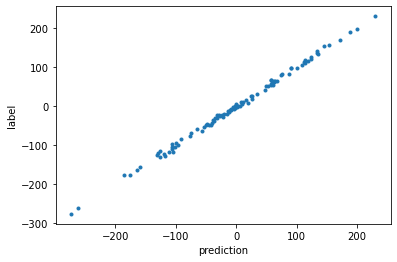

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

pred = mdl.predict(x_data)
plt.plot(pred, y_label, '.')
plt.xlabel('prediction')
plt.ylabel('label')

We see that the coefficient values for uninformative features are close to zero, and that the estimates of the non-zero values are pretty close.

**E.** Vary the parameter values in the function call to `make_regression` and fit the model again. Does the closeness of the parameter estimates vary as you would expect?  
Change `n_informative` to `0` and examine the model coefficients.

# Model Evaluation

The previous example raises an important question: how do we know what a "good" result is? We can see that the coefficients in the previous example are close, but only because we know exactly how our data was generated. Realistically, this is not a situation that can happen (if we knew the parameters, we wouldn't need to estimate them!).  
  
More generally: we can't evaluate model parameters directly. Instead, we can examine how well our model's predictions line up against our labels. We are effectively asking, "how well do our predictions match our data?"  
  
This is one of many steps in abstracting a machine learning model. Our evaluation is now less concerned about the model itself, and more about _how well it can estimate our data labels_.  
> For data of the form $Y = f(X)$ where X is input data, Y is the corresponding set of labels, and $f$ is a function that maps X onto Y, we evaluate a proposed model $\hat{f}$ and its predictions, $\hat{Y}$ using some evaluation metric $Err(Y, \hat{Y}) = Err(Y, \hat{f}(X))$  
  
Every machine learning model requires an evaluation metric. The underlying learning algorithm for a model uses the evaluation metric to determine the optimal value of parameters. _By definition_, the optimal value of parameters are the ones that minimize the discrepency between the true labels $Y$ and the predicted labels $\hat{Y}$.  

**Q.** In the example model above, what was evaluation metric?

***
## Example Estimator Evaluation 1

Let's quantify the fit of a model. As before, we'll create data and initialize a model. This time, we'll take a subset of data to fit our model. Store the first 20 entries into `x_data_0` and `y_label_0`, and the remaining entries in `x_data_1` and `y_label_1`.
  
**Python reminder:** You can take subsets using [brackets], with a range of indices separated by a colon `:`
`x[0:100]` will take the first 100 entries of `x`. Python considers the given range to be half-open; the first index is included, but the last is not. `x[0:10]` includes x[0]...x[9], but not x[10].  
Python indexing also allows you to omit the first or last index; `x[:5]` is equivalent to `x[0:5]`. Similarly, `x[5:]` returns all entries from `x[5]` until (and including) the last entry.

In [15]:
from sklearn.linear_model import LinearRegression
# Generate new data using make_regression
x_data, y_label, coef = make_regression(n_samples=100, n_features=5, n_informative=3, 
                                        noise=50, coef=True, random_state=50)
###
x_data_0, x_data_1 = x_data[:20], x_data[20:]
y_label_0, y_label_1 = y_label[:20], y_label[20:]
###

mdl = LinearRegression()
mdl.fit(x_data_0, y_label_0)
print(coef)
print(mdl.coef_)

[ 0.          3.75493615 49.75894195 98.15077642  0.        ]
[ 32.31333816  13.09546195  60.17664293 110.73633359 -35.52590518]


`sklearn` has a module for a number of different metrics: `sklearn.metrics`. You can see a list of available metrics on the documentation page ([link](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)).

For our linear model, we'll look at the $R^2$ score, which you can access through `sklearn.metrics.r2_score`. To do so, we'll need the data labels (`y_label_0`) and the model's predictions based on the input data. All estimators have a `predict` method, which lets us get model predictions for a given dataset:

In [16]:
import sklearn.metrics
y_pred_0 = mdl.predict(x_data_0)
r2 = sklearn.metrics.r2_score(y_label_0, y_pred_0)
print(r2)

0.8582826145291957


Evaluating with other metrics works the same way. We can evaluate the Mean Squared Error (MSE) the same way:

In [17]:
mse = sklearn.metrics.mean_squared_error(y_label_0, y_pred_0)
print(mse)

2548.5060486274206


The $R^2$ score is certainly more intuitive, but the metrics still raise an important question: how do we know when a model is performing _well_?  
***

## Evaluation Beyond Metrics

In the previous section, if you examine the true coefficients (`coef`) and compare them to the model coefficients (`mdl.coef_`), you might notice that they aren't quite right, particularly for the uninformative features. Further, the $R^2$ score looks suspiciously high.  
Remember that we split our data into two sections, `x_data_0` and `x_data_1`. Let's evaluate our model using our second slice of data.

In [18]:
y_pred_1 = mdl.predict(x_data_1)
r2 = sklearn.metrics.r2_score(y_label_1, y_pred_1)
print(r2)

0.5790615407065001


The second slice of data was generated using the same distribution as the first slice, yet our model did poorly. Putting quantitative metrics aside for a moment: 

**Q. Intuitively, what do we mean when we ask whether a model performs well?**
  
The answer is similar for the more-general question, "How do we know we can trust a scientific result?" Scientific findings do not exist in a vaccuum; hypotheses turn into theories when they make predictions that can be independently reproduced.  
  
**Q.** Looking at the example above, what did we do?  
  
With simpler models and some assumptions on the noise distribution, we could use statistical methods such as t-tests to determine whether our results were significant. However, it is not always possible to meet the requirements of these tests. The approach taken with machine learning models is to instead divide our data into multiple portions: one for determining model parameters (fitting our estimator), and another evaluating our model performance.  
In the example above, the first evaluation is not indicative of the model performance; it does well on data it has already seen, but it does not generalize well to unseen data. Since our interest is _always_ in data that we have not seen, we can conclude that our model does not perform well.

# Dataset Handling

As we saw in the previous section, it is important to divide our data into two separate sets. These two sets are known as the **training** and **testing** sets.  
The _training_ set is used to optimize the model parameters directly against the metric. This set is the one that would be used in the `fit` method above. 'Good' results on the training set are meaningless.  
The _testing_ set is used to evaluate model performance on unseen data. It is never used to modify any model parameters, and should used exactly once: immediately before reporting results. Once evaluated, any further evaluation should be considered no different than evaluating on the training set.  
  
Let's generate some new data and visualize what our model is actually doing. We'll limit ourselves to 2 dimensions to make it easier to plot. `sklearn` has a helper function `sklearn.model_selection.train_test_split` that will be useful for splitting data.

In [19]:
import sklearn.model_selection
help(sklearn.model_selection.train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

## Dataset Handling Example 1
We want to do the following:
1) Generate a new dataset that allows us to visualize it. (1 input dimension, 1 output dimension)  
2) Plot the data using matplotlib.  
3) Split the data into two sets using `sklearn`'s `train_test_split`  
4) Plot the sets, using different colours to indicate the training/testing sets.  
  
**Note**: To plot figures directly in Jupyter, use `%matplotlib inline` before plotting.

In [20]:
# Generate our data:
x_data, y_label = sklearn.datasets.make_regression(n_samples=100, noise=15, n_features=1, n_informative=1)
# Verify its shape:
print(x_data.shape)
print(y_label.shape)

(100, 1)
(100,)


Text(0, 0.5, 'label value')

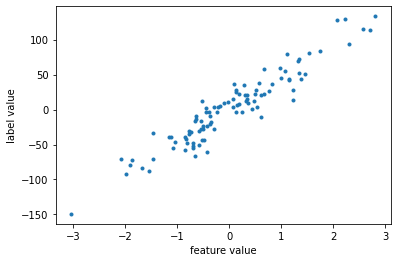

In [21]:
# Matplotlib is a Python package for plotting data. The main module is matplotlib.pyplot
from matplotlib import pyplot as plt   # Allows us to refer to this package as 'plt' from now on
%matplotlib inline

plt.plot(x_data, y_label, '.')
plt.xlabel('feature value')
plt.ylabel('label value')

In [22]:
# import train_test_split
from sklearn.model_selection import train_test_split
# help(train_test_split)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, train_size=0.6)
print(x_train.shape)

(60, 1)


Text(0, 0.5, 'label value')

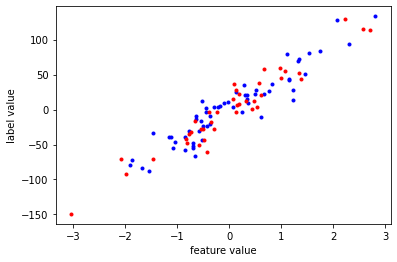

In [23]:
# Plot data using different colors
plt.figure()
plt.plot(x_train, y_train, '.', color='blue')
plt.plot(x_test, y_test, '.', color='red')
plt.xlabel('feature value')
plt.ylabel('label value')

Let's train a model to get the best fit line across our data, then plot the line on for the training and testing sets on two separate plots.  
1) Initialize a model  
2) Fit to the training data  
3) From the trained model parameters, plot the best fit line over the training data.  
4) Print the model score for the training data
5) Repeat (3,4) for the testing data.  

In [24]:
import sklearn.linear_model
mdl = sklearn.linear_model.LinearRegression()
mdl.fit(x_train, y_train)
print(mdl.coef_)
print(mdl.intercept_)

[44.39733659]
0.9918550581481802


0.882989355227437


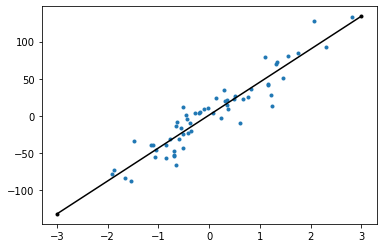

In [25]:
plt.figure()
plt.plot(x_train, y_train,'.')
slope = mdl.coef_
intercept = mdl.intercept_
plt.plot([-3, 3], [slope*-3+intercept, slope*3+intercept],'.-',color='black')
print(mdl.score(x_train, y_train))

0.9186824349564815


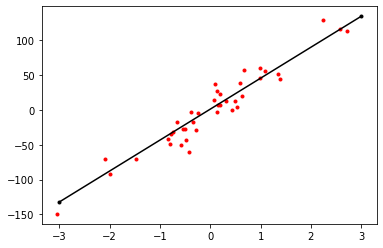

In [26]:
plt.figure()
plt.plot(x_test, y_test, '.', color='red')
plt.plot([-3, 3], [slope*-3+intercept, slope*3+intercept], '.-',color='black')
print(mdl.score(x_test, y_test))

Depending on the values you used to generate the data and subsequently split it, you'll see the fit behave differently.  
Return to where you initialized the data, and experiment with different values for the noise and number of samples. Try different values for the data split; what effect does this have on the training vs. testing error?

## Dataset Handling Example 2

The previous exercise demonstrates the effect of differently-sized splits of the data. In this one, we'll examine one of the most common problems in machine learning: overfitting.  
Overfitting is when a model is optimized to its training set to the detriment of performance on the testing set. i.e., doing much better on the training set than the test set. The model "memorizes" the data it has seen and can reproduce it well, but does poorly when predicting based on new data.  
  
In this example, we'll examine the effect of model complexity on evaluation metrics.  
  
1) First, we'll generate data. We'll a sample a parabola at random points.  
2) Plot the data.  
3) Use PolynomialFeatures to create powers of our random samples.  
4) For each polynomial degree between 0 and 20, plot the fitted model performance.  
5) Plot the predictions vs. feature and labels vs. feature on the same plot.

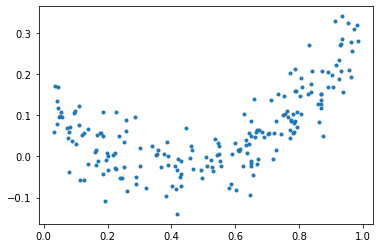

In [43]:
import numpy as np
x_data = np.random.random((200,1))
y_label = (x_data-0.2)*(x_data-0.6) + np.random.randn(x_data.shape[0], 1)*0.05
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, train_size=0.5)
plt.plot(x_data, y_label,'.')

We don't generally know the function mapping `x_data` to `y_label`. One way to increase our model complexity is to include polynomials of our features (e.g. age and age squared). Let's fit a polynomial of power of 5.
Note: `sklearn` has a method for creating powers of data, `sklearn.preprocessing.PolynomialFeatures`


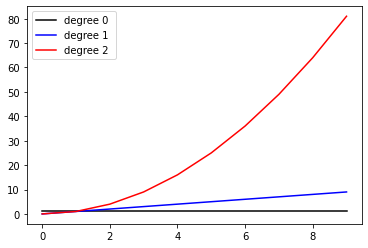

In [44]:
# Example use of PolynomialFeatures:
from sklearn.preprocessing import PolynomialFeatures  # Import method
example_data = np.array(range(10))   # 0 1 2 3 ... 9
example_data = np.reshape(example_data, (10, 1))  # Reshape data to conform to sklearn requirements (x, 1)

poly_feat_maker = PolynomialFeatures(degree=2)  # Initialize object
example_features = poly_feat_maker.fit_transform(example_data)  # Apply transformation

plt.plot(example_features[:,0], 'k')
plt.plot(example_features[:,1], 'b')
plt.plot(example_features[:,2], 'r')
plt.legend(['degree 0','degree 1 ','degree 2'])

In [45]:
# Import
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Create polynomials of features
###
poly_feat = PolynomialFeatures(degree=4)
feat_train = poly_feat.fit_transform(x_train)
###
# Fit model to the new features
mdl = LinearRegression()
mdl.fit(feat_train, y_train)

# Print score of training set
print(mdl.score(feat_train, y_train))

0.7342626352875194


In [46]:
# Create polynomials of features for test set
# Evaluate on test set
feat_test = poly_feat.fit_transform(x_test)
print(mdl.score(feat_test, y_test))

0.7346880928752861


In [47]:
test_scr_list = []
train_scr_list = []
for i in range(20):
    poly_feat = PolynomialFeatures(degree=i)
    feat_train = poly_feat.fit_transform(x_train)
    mdl = LinearRegression()
    mdl.fit(feat_train, y_train)
    feat_test = poly_feat.fit_transform(x_test)
    train_scr_list.append(mdl.score(feat_train, y_train))
    test_scr_list.append(mdl.score(feat_test, y_test))

Text(0.5, 1.0, 'Predicted curve by linear regression')

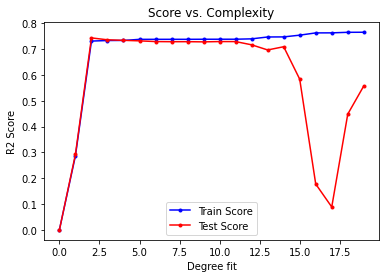

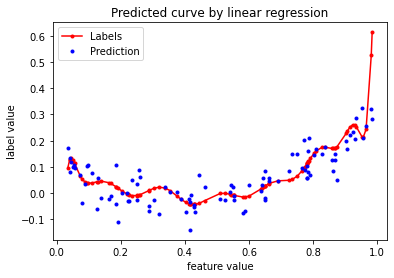

In [48]:
# Score plot
plt.figure()
plt.plot(train_scr_list, 'b.-')
plt.plot(test_scr_list, 'r.-')
plt.xlabel('Degree fit')
plt.ylabel('R2 Score')
plt.legend(['Train Score', 'Test Score'])
plt.title('Score vs. Complexity')

# Prediction plot
plt.figure()
pred = mdl.predict(feat_test)
xind = np.argsort(x_test[:,0])
plt.plot(x_test[xind], pred[xind],'r.-')
plt.plot(x_test, y_test, 'b.')
plt.xlabel('feature value')
plt.ylabel('label value')
plt.legend(['Labels','Prediction'])
plt.title('Predicted curve by linear regression')

Examine the two plots above; vary the values for the amount of noise, number of samples.  
The first plot depicts the model performance vs. degree fit. Typically, we'll see an increase in performance with increasing complexity, followed by a decrease. In this case, we see a peak at a degree of 2 and comparable performance for a few degrees but with a general downward trend. This is due to the model starting to overfit.  
  
Vary the degree for the polynomial fit and examine its effect. What happens when you have a small value? What happens when you have a large value?